<a href="https://colab.research.google.com/github/mgje/PIUMP/blob/master/lab/IEEE745_FliesskommaZahlen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fliesskommazahlen mit Python erforschen

In [ ]:
import struct

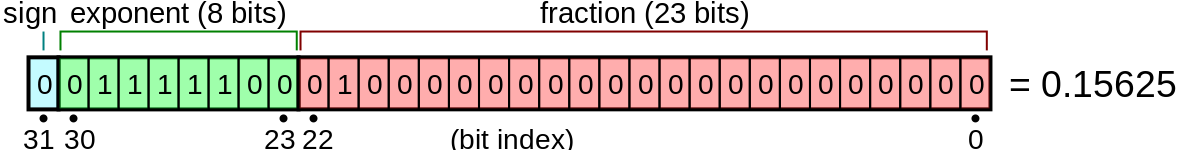

In [ ]:
def float_to_bin(num):
    bits, = struct.unpack('!I', struct.pack('!f', num))
    return "{:032b}".format(bits)

out=float_to_bin(0.15625)
print("IEEE754: \t%s"%out)
e = out[1:9]
m = out[9:32]
print("E: \t%s"%e)
print("M: \t%s"%m)

IEEE754: 	00111110001000000000000000000000
E: 	01111100
M: 	01000000000000000000000


In [ ]:
def ieee745(N): # ieee-745 bits (max 32 bit)
    a = int(N[0])        # sign,     1 bit
    b = int(N[1:9],2)    # exponent, 8 bits
    c = int("1"+N[9:], 2)# fraction, len(N)-9 bits

    return (-1)**a * c /( 1<<( len(N)-9 - (b-127) ))

def ieee745d(e, m, v=0): # Exponent, Matisse, Vorzeichen 
    a = v               # sign,     1 bit
    b = e               # exponent, 8 bits
    c = 2**23+m         # fraction, len(N)-9 bits

    return (-1)**a * c /( 1<<( 32-9 - (b-127) ))


V = "0"
E = "01111100"
M = "00000000000000000000000"

Z = V+E+M  
print( ieee745(Z)  )  
print( ieee745d(124,0))

0.125
0.125


### Darstellung einer normalisierten Gleitkommazahl
$ \huge{Z = (-1)^s \cdot \left( m+2^{23} \right) \cdot 2^{e-(127+23)}}$

Vorzeichen s (1 Bit)
Mantisse m (M Bits)
Basis 2 Gleitkommazahlen nach IEEE 754 ist 
Exponent $e = E-127$ (E Bits)

In [ ]:
s = 0
m = 1
e = 127


Z = (-1)**s*(m+2**23)*2**(e-(127+23))
Z

1.0000001192092896

### Zahlen zwischen 1 und 2 (ohne 2) haben als Exponent 01111111, also 127

- Welches ist die kleinste Flieskommazahl zwischen 1 und 2?
- Welches ist die grösste Fliesskommazahl zwischen 1 und 2
- Wiviele Fliesskommazahlen gibt es zwischen 1 und 2 ? 
- Wie gross ist die Lücke ?

In [ ]:
V = "0"
E = "01111111"
M = "00000000000000000000000"
#M = "11111111111111111111111"

Z = V+E+M  
print( ieee745(Z)  )  

1.0


# Spektrum mit matplotlib visualisieren

In [33]:
""" matplotlib """ 
# Libraries
import numpy as np
import time
import matplotlib
from matplotlib import colors
import matplotlib.pyplot as plt

In [31]:
def showspec(X): #Array as Input
  N = len(X)
  x = np.array(X)
  y = np.array([1.0]*N)

  plt.stem(x,y,linefmt='--',markerfmt='',
           use_line_collection=True)
  return plt.show()

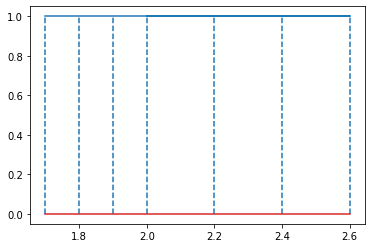

In [32]:
 A = [2,2.2,2.4,2.6,1.9,1.8,1.7]
 showspec(A)

# Welche Fliesskommazahlen sind in der Nähe von 1.0 ?

In [ ]:
float_to_bin(1.0)

'00111111100000000000000000000000'

In [ ]:
Z = []

Z.append(ieee745('00111111100000000000000000000000'))
Z.append(ieee745('00111111100000000000000000000001'))

Z

[1.0, 1.0000001192092896]

In [ ]:
Z[1]-Z[0]

1.1920928955078125e-07

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


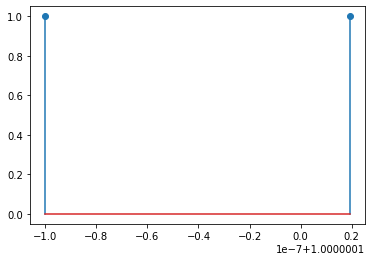

In [ ]:
showspec(Z)

In [ ]:
W = []
e = 127
for m in range(11):
  W.append(ieee745d(e,m))

W

[1.0,
 1.0000001192092896,
 1.000000238418579,
 1.0000003576278687,
 1.0000004768371582,
 1.0000005960464478,
 1.0000007152557373,
 1.0000008344650269,
 1.0000009536743164,
 1.000001072883606,
 1.0000011920928955]

In [ ]:
U = []
e = 126
for m in range(1,11):
  U.append(ieee745d(e,2**23-m))
U

[0.9999999403953552,
 0.9999998807907104,
 0.9999998211860657,
 0.9999997615814209,
 0.9999997019767761,
 0.9999996423721313,
 0.9999995827674866,
 0.9999995231628418,
 0.999999463558197,
 0.9999994039535522]

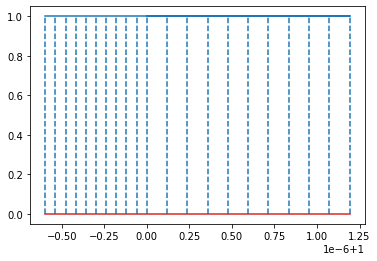

In [34]:
S = np.array(W+U)
showspec(S)